# **Project Name**    - Uber Supply Demand Gap Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The objective of this project is to examine Uber ride request data to determine supply and demand patterns by time of day and pickup locations. The data set includes user ride request details, i.e., including requests and drop times, pickup locations (City or Airport), driver assignments, and trip status such as "Trip Completed," "Cancelled," or "No Cars Available." The analysis seeks to determine when and where the demand for rides exceeds the supply of available drivers, and the requests are not fulfilled. Through an examination of trends by pick-up point, day of week, and hour of day, the project will identify the most impactful service gaps in coverage. The findings from this analysis will enable Uber to better comprehend peak periods of demand, assignment problems with drivers, and operational inefficiencies and ultimately inform data-driven initiatives to enhance customer experience and minimize cancellations and missed opportunities.

# **GitHub Link -**

[Uber Supply Demand Gap EDA](https://github.com/pmehta2612/Uber-Supply-Demand-Gap-Analysis/tree/main/Python)

# **Problem Statement**


Uber, one of the most prominent ride-hailing platforms, has a fundamental operations issue with driver and rider demand misalignment for rides, especially during peak hours. This creates high volumes of cancelled rides and "no cars available" situations that create customer disappointment and inefficiency in the service. The biggest challenge is how to discover when and where these demand-supply imbalances are happening, particularly across various times of day and pickup locations such as the city and the airport. For this, there need to be analyzed historical ride request histories to determine patterns in user demand and driver performance allocation. By recognizing these trends, Uber can devise specific strategies to optimize the use of drivers and increase overall service availability.

#### **Define Your Business Objective?**

1. Identify demand-supply mismatches across various time slots and pickup locations (City vs. Airport).

2. Filter through patterns of ride requests to identify peak hours and high-demand days.

3. Track driver availability and assignment levels to measure operational effectiveness.

4. Examine reasons for trip failure causes like cancellations and "No Cars Available" incidents.

5. Offer actionable insights to optimize driver allocation during high-demand times.

6. Enable data-driven decision-making to enhance customer satisfaction and reduce missed opportunities.

7. Improve Uber's resource planning by matching supply with actual and planned demand patterns.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Function to load a CSV file into a pandas DataFrame
def load_excel(file_path):
    try:
        return pd.read_excel(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

# Define file paths for the dfs
uber_path = '/content/drive/MyDrive/Labmentix_Internship_Projects/Uber Supply Demand Gaps_Project/Uber_Request_Data (Excel).xlsx'  # File path for the uber df
# Load the df using the load_csv function
uber_df = load_excel(file_path=uber_path)  # Load uber df
# Display all columns
pd.set_option('display.max_columns', None)



Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
uber_df.head()

,Request_ID,Pickup_Point,Driver_ID,Status,Request_Timestamp,Drop_Timestamp,Request Date,Request Hour,Weekday,Trip Duration (Mins),Driver Status,Drop Time Status
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,69.000000,Driver Assigned,Trip Completed
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,50.000000,Driver Assigned,Trip Completed
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,41.000000,Driver Assigned,Trip Completed
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,55.000000,Driver Assigned,Trip Completed
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,52.516667,Driver Assigned,Trip Completed


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Number of Rows: {uber_df.shape[0]}")
print(f"Number of Columns: {uber_df.shape[1]}")

Number of Rows: 6745
Number of Columns: 12


### Dataset Information

In [5]:
# Dataset Info
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Request_ID            6745 non-null   int64         
 1   Pickup_Point          6745 non-null   object        
 2   Driver_ID             4095 non-null   float64       
 3   Status                6745 non-null   object        
 4   Request_Timestamp     6745 non-null   datetime64[ns]
 5   Drop_Timestamp        2831 non-null   datetime64[ns]
 6   Request Date          6745 non-null   datetime64[ns]
 7   Request Hour          6745 non-null   int64         
 8   Weekday               6745 non-null   object        
 9   Trip Duration (Mins)  2831 non-null   float64       
 10  Driver Status         6745 non-null   object        
 11  Drop Time Status      6745 non-null   object        
dtypes: datetime64[ns](3), float64(2), int64(2), object(5)
memory usage: 632.5+ K

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f"Number of Duplicate Values: {uber_df.duplicated().sum()}")

Number of Duplicate Values: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print("Number of Missing Values:")
print(uber_df.isnull().sum())

Number of Missing Values:
Request_ID                 0
Pickup_Point               0
Driver_ID               2650
Status                     0
Request_Timestamp          0
Drop_Timestamp          3914
Request Date               0
Request Hour               0
Weekday                    0
Trip Duration (Mins)    3914
Driver Status              0
Drop Time Status           0
dtype: int64


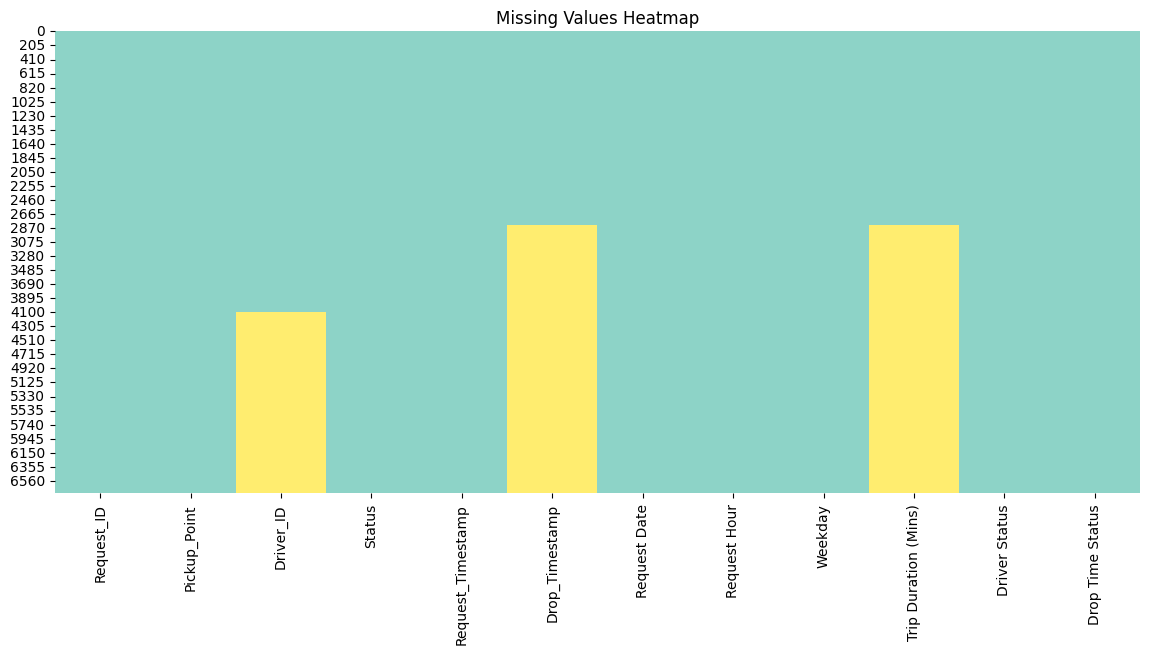

In [8]:
# Visualizing the missing values
# Create heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(uber_df.isnull(), cbar=False, cmap='Set3')
# Add title
plt.title('Missing Values Heatmap')
# Show plot
plt.show()

### What did you know about your dataset?

The data set includes detailed information about Uber ride requests that have been placed over period of time, capturing various aspects of the service availability and user demand. Each record refers to a unique ride request and has the following attributes: request timestamp, pickup location (City or Airport), request status (No Cars Available, Cancelled, or Trip Completed), and the driver ID. Other columns derived for additional analysis purposes, including request date and time, day of the week, and flag for whether a request was made during peak. Trip length in minutes is also recorded for completed trips, as well as flags for whether a driver was assigned and whether a trip was filled. The combination of original and helper columns gives the entire picture of both demand (ride requests) and supply (drivers online) such that supply-demand gaps can be easily analyzed in terms of time and locations.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("Columns in Dataset:")
print(uber_df.columns)

Columns in Dataset:
Index(['Request_ID', 'Pickup_Point', 'Driver_ID', 'Status',
       'Request_Timestamp', 'Drop_Timestamp', 'Request Date', 'Request Hour',
       'Weekday', 'Trip Duration (Mins)', 'Driver Status', 'Drop Time Status'],
      dtype='object')


In [10]:
# Dataset Describe
uber_df.describe()

,Request_ID,Driver_ID,Request_Timestamp,Drop_Timestamp,Request Date,Request Hour,Trip Duration (Mins)
count,6745.000000,4095.000000,6745,2831,6745,6745.000000,2831.000000
mean,3384.644922,149.501343,2016-07-13 13:43:04.303039232,2016-07-13 13:15:33.899328768,2016-07-13 00:15:47.902149376,12.956709,52.413753
min,1.000000,1.000000,2016-07-11 00:00:00,2016-07-11 00:51:00,2016-07-11 00:00:00,0.000000,20.783333
25%,1691.000000,75.000000,2016-07-12 07:51:00,2016-07-12 07:42:00,2016-07-12 00:00:00,7.000000,41.000000
50%,3387.000000,149.000000,2016-07-13 14:23:37,2016-07-13 12:14:06,2016-07-13 00:00:00,13.000000,52.083333
75%,5080.000000,224.000000,2016-07-14 19:39:27,2016-07-14 19:13:52,2016-07-14 00:00:00,19.000000,64.000000
max,6766.000000,300.000000,2016-07-15 23:59:58,2016-07-16 01:09:24,2016-07-15 00:00:00,23.000000,83.000000
std,1955.099667,86.051994,NaN,NaN,NaN,6.504052,13.850693


### Variables Description

1. **Request_ID:** Unique request ID for every ride request

2. **Pickup_Point:** Location of pickup of the ride (City or Airport)
3. **Status:** Final status of the request (Trip Completed, Cancelled, No Cars Available)
4. **Request_Timestamp:** Date and timestamp when the ride was requested
5. **Drop_Timestamp:** Date and timestamp when the ride was dropped (if any)
6. **Driver_ID:** ID of the driver for the trip (if any)
7. **Request_Date:** Date from the request timestamp
8. **Request_Hour:** Hour from the request timestamp
9. **Weekday:** Day of week request was made
10. **Trip_Duration_Minutes:** Time taken to complete the trip in minutes (for completed trips only)
11. **Peak_Hour_Flag:** Whether the request is made during peak hours (Morning/Evening/Off-Peak)
12. **Driver_Status:** Whether a driver is assigned to the request
13. **Drop_Time_Status:** Whether the trip is completed or not based on drop time

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for column in uber_df.columns:
    unique_values = uber_df[column].nunique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for Request_ID: 6745
Unique values for Pickup_Point: 2
Unique values for Driver_ID: 300
Unique values for Status: 3
Unique values for Request_Timestamp: 5618
Unique values for Drop_Timestamp: 2598
Unique values for Request Date: 5
Unique values for Request Hour: 24
Unique values for Weekday: 5
Unique values for Trip Duration (Mins): 1472
Unique values for Driver Status: 2
Unique values for Drop Time Status: 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Create copy of dataset
df = uber_df.copy()

In [13]:
# Replace Trip duration column name
df.rename(columns={'Trip Duration (Mins)': 'Trip_Duration_Minutes'}, inplace=True)

In [14]:
# Standardize column names
df.columns = df.columns.str.capitalize().str.replace(' ', '_')

In [15]:
# Convert driver_id to int type
df['Driver_id'] = df['Driver_id'].astype('Int64')

# Round trip duration values to 0 decimal places
df['Trip_duration_minutes'] = df['Trip_duration_minutes'].round(0)

# Convert trip duration to int datatype
df['Trip_duration_minutes'] = df['Trip_duration_minutes'].astype('Int64')

In [16]:
# Create Time Slots
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return "Late Night"
    elif 6 <= hour < 10:
        return "Early Morning"
    elif 10 <= hour < 13:
        return "Late Morning"
    elif 13 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["Time_of_day_slot"] = df["Request_hour"].astype(int).apply(get_time_of_day)


In [17]:
# Supply Demand Flag
df["Gap_Flag"] = df["Status"].apply(
    lambda x: "No Gap" if x.strip().title() == "Trip Completed"
    else "Gap"
)

In [18]:
# View cleaned dataset
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour,Weekday,Trip_duration_minutes,Driver_status,Drop_time_status,Time_of_day_slot,Gap_Flag
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,69,Driver Assigned,Trip Completed,Late Morning,No Gap
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,50,Driver Assigned,Trip Completed,Evening,No Gap
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,41,Driver Assigned,Trip Completed,Early Morning,No Gap
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,55,Driver Assigned,Trip Completed,Night,No Gap
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,53,Driver Assigned,Trip Completed,Early Morning,No Gap


In [19]:
# Save the cleaned dataset in excel format
#df.to_excel('/content/drive/MyDrive/Labmentix_Internship_Projects/Uber Supply Demand Gaps_Project/Uber_Request_Data_Cleaned.xlsx', index=False)

### What all manipulations have you done and insights you found?

In order to examine the supply-demand gap for Uber, the data was preprocessed and cleaned initially through MS Excel and further wrangled in Python for deeper analytical insight.

#### **MS Excel:**
Temporal key factors like Request Date, Request Hour, and Weekday were derived from the Request Timestamp in Excel for supporting time-based analysis. Trip Duration (mins) was derived as a new column for completed trips by subtracting the request vs. drop timestamp. To gain more insight into trip results and driver assignment, two new status flags were added: Driver Status, to indicate whether a driver was assigned, and Drop Time Status, to indicate whether the ride was taken, cancelled, or not available.

#### **Python:**
After importing the cleaned data into Python, two additional important columns were added to analyze the supply-demand dynamics further. The Time Slot of Day column was used to categorize ride requests into time slots like Early Morning, Afternoon, and Evening depending on the time of the request to view the demand pattern more comfortably throughout the day. Additionally included was a Gap Flag column to mark every request as Demand Fulfilled (Trip Completed) or Demand Unfulfilled (Cancelled or No Cars Available).

Throughout the process, missing values in columns such as Drop Timestamp and Driver ID were not data quality issues but were actually situations where no trip was made or no driver was present. They were left intact on purpose to maintain the integrity of supply-demand gap analysis.

#### **Insights-**
1. The data set has genuine missing values that reflect unserved demand and not errors.

2. The resulting Gap Flag is easily measurable and visualizable where and when the supply is short.

3. The Time Slot of Day dimension facilitates accurate identification of peak unavailability times - particularly during Early Morning and Evening slots.

4. The data is now in a proper format for additional analysis, visualization, and decision-making regarding how to enhance Uber's supply planning and driver allocation strategies.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [20]:
plt.style.use('ggplot')

### **Univariate Analysis**

#### Chart - 1 - Pick Up Point Distribution

In [21]:
# Frequency and percentage of each pickup location
pp_summary = (
    df['Pickup_point']
      .value_counts(dropna=False)                # absolute counts
      .to_frame('count')                        # convert to DF
      .assign(percent=lambda x: x['count']*100/len(df))  # %
)
print("Pickup Point distribution\n", pp_summary)

Pickup Point distribution
               count   percent
Pickup_point                 
City           3507  51.99407
Airport        3238  48.00593


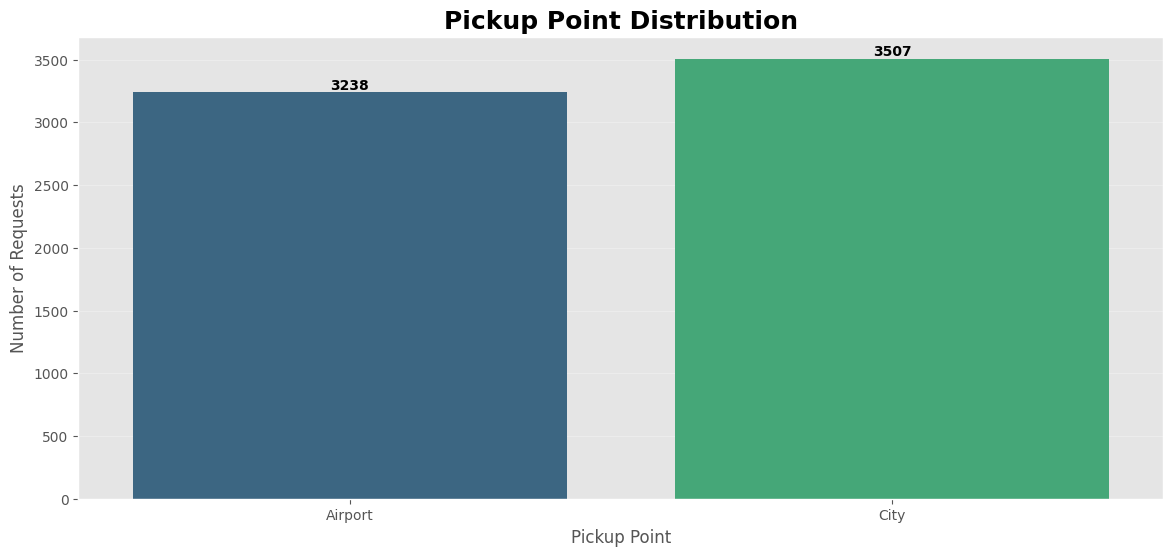

In [22]:
# Chart - 1 visualization code
# Value counts for pick up points
pp_counts = df['Pickup_point'].value_counts()
# Set figure size
plt.figure(figsize=(14, 6))
# Create count plot
ax = sns.countplot(x=df['Pickup_point'], palette='viridis')
# Set title and labels
plt.title('Pickup Point Distribution', fontsize = 18, fontweight = 'bold')
plt.xlabel('Pickup Point', fontsize = 12)
plt.ylabel('Number of Requests', fontsize = 12)
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight = 'bold')
plt.grid(axis = 'y', alpha = 0.3)
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the most suitable to show the number of requests that come from each pickup point as it is categorical and can compare side-by-side comparison of values.

##### 2. What is/are the insight(s) found from the chart?

The city receives much more ride requests than the airport. It implies that there's greater demand originating from the city area.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights can be useful in optimal resource allocation. More drivers can be put into service within the city to satisfy demand. This also suggests that airport demand is under-served, and such a situation can create customer dissatisfaction within the area if not resolved.

#### Chart - 2 - Trip Status Breakdown

In [23]:
# Trip status breakdown
status_summary = (
    df['Status']
      .value_counts(dropna=False)
      .to_frame('count')
      .assign(percent=lambda x: x['count']*100/len(df))
)
print("\nTrip Status distribution\n", status_summary)


Trip Status distribution
                    count    percent
Status                             
Trip Completed      2831  41.971831
No Cars Available   2650  39.288362
Cancelled           1264  18.739807


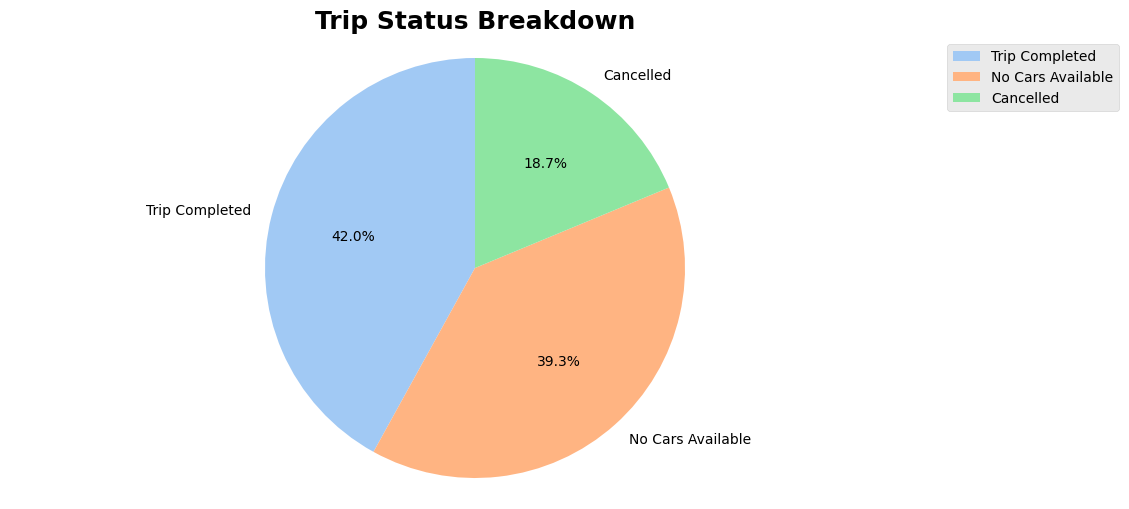

In [24]:
# Chart - 2 visualization code
# Set figure size
plt.figure(figsize=(12,6))
# Create pie chart to show trip status breakdown
plt.pie(status_summary['count'], labels=status_summary.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
# Add title
plt.title('Trip Status Breakdown', fontsize = 18, fontweight = 'bold')
# Make the pie at center
plt.axis('equal')
# Add legend well aligned
plt.legend(loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart enables users to visually identify easily the proportions of categorical variables and determine which trip statuses predominate.

##### 2. What is/are the insight(s) found from the chart?

Most of the trips are cancelled or unavailable cars, and hence most of the requests are not fulfilled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight shows a key supply problem. Too many cancellations or no-car situations are a bad business sign, leading to revenue loss and poor customer experience. This calls for an immediate intervention to improve supply or cut cancellations.

#### Chart - 3 - Driver Availability at Request Time

In [25]:
# Driver status
driver_status_summary = (
    df['Driver_status']
      .value_counts(dropna=False)
      .to_frame('count')
      .assign(percent=lambda x: x['count']*100/len(df))
)
print("\nDriver Status at Request distribution\n", driver_status_summary)



Driver Status at Request distribution
                     count    percent
Driver_status                       
Driver Assigned      4095  60.711638
No Driver Assigned   2650  39.288362


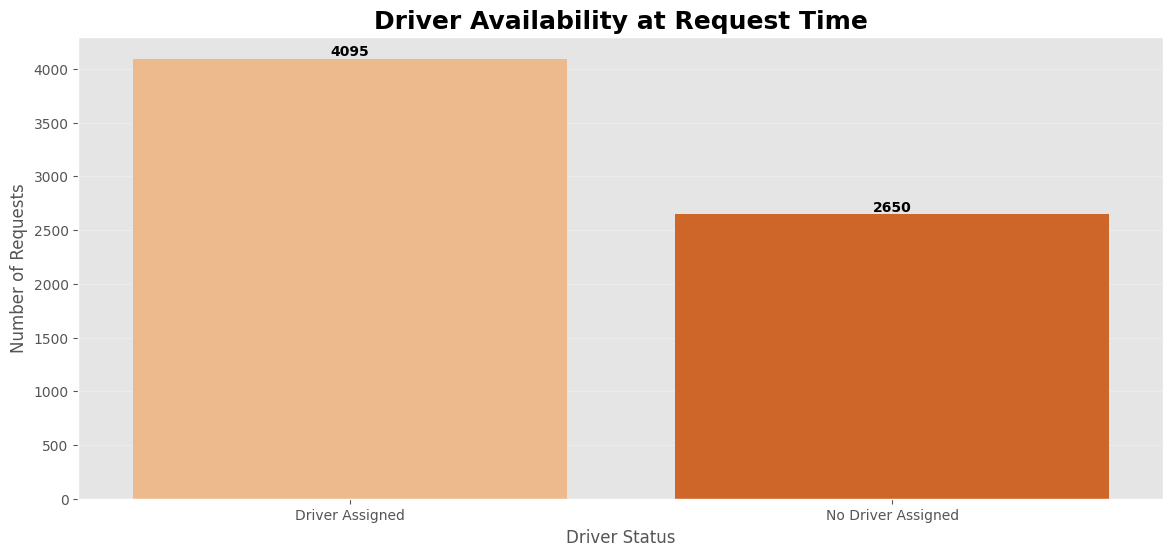

In [26]:
# Chart - 3 visualization code
# Create countplot
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='Driver_status',
                   order=df['Driver_status'].value_counts().index,
                   palette='Oranges')
# Add title and labels
plt.title("Driver Availability at Request Time", fontsize = 18, fontweight = 'bold')
plt.xlabel("Driver Status", fontsize = 12)
plt.ylabel("Number of Requests",fontsize = 12)
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight = 'bold')
plt.grid(axis = 'y', alpha = 0.3)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart would be best to use here as it can display how many times a driver was available or unavailable upon request.


##### 2. What is/are the insight(s) found from the chart?

Significant numbers of cases where drivers were not available, especially during rush hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The finding requires a strategic shift in scheduling vehicles. The negative growth can be observed as there are many unserved requests due to unavailability would affect customer trust and usage. This adds to the reliability of the service.

#### Chart - 4 - Drop-Time Punctuality

In [27]:
# Drop Time Status
drop_time_summary = (
    df['Drop_time_status']
      .value_counts(dropna=False)
      .to_frame('count')
      .assign(percent=lambda x: x['count']*100/len(df))
)
print("\nDrop‑time Status distribution\n", drop_time_summary)


Drop‑time Status distribution
                   count    percent
Drop_time_status                  
No Trip            3914  58.028169
Trip Completed     2831  41.971831


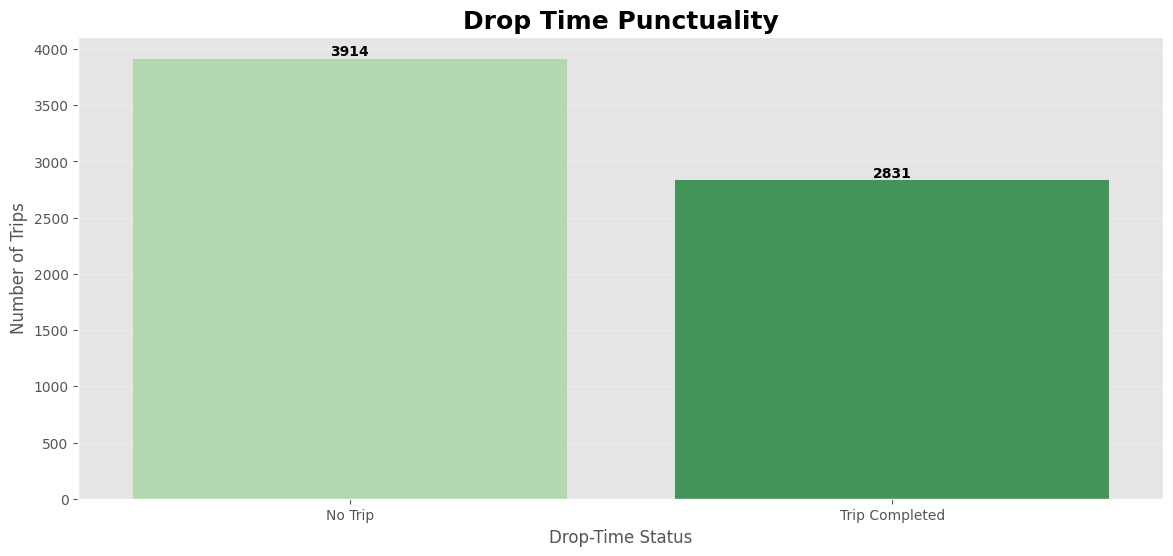

In [28]:
# Chart - 4 visualization code
# Create countplot
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='Drop_time_status',
                   order=df['Drop_time_status'].value_counts().index,
                   palette='Greens')
# Add title and labels
plt.title("Drop Time Punctuality", fontsize = 18, fontweight = 'bold')
plt.xlabel("Drop-Time Status", fontsize = 12)
plt.ylabel("Number of Trips", fontsize = 12)
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight = 'bold')
plt.grid(axis = 'y', alpha = 0.3)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is a great one to compare category values such as "Trip Completed" and "No Trip" in terms of drop time outcomes. It shows how frequently each category happens very easily, making it simpler to evaluate trip completion patterns and service reliability.

##### 2. What is/are the insight(s) found from the chart?

* The graph shows that "No Trip" results (i.e., cancellations or requests with no available cars) are much more than successful "Trip Completed" results.

* This shows that the majority of customers never did arrive at their destination because they were drivers unavailability or because the requests had been cancelled.

* Even if punctuality of finished trips were good, the number of unfinished trips is much greater than that of finished ones and that's a major concern.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* This insights highlights a critical point of failure in services.

* By understanding how much demand remains unfilled allows the business to realign driver supply, schedule more intelligently, and avoid friction in peak-demand slots.

**Negative Growth:**

* A high "No Trip" results indicate lost revenue, poor customer experience, and lower retention.

* The insight just indicates negative growth due to inefficiency in executing and fulfilling ride requests.

* If left unchecked, it may result in brand trust loss, particularly during peak usage when users are most short on time.

#### Chart - 5 - Time-of-Day Slot Distribution

In [29]:
# Time of Day Slots
slot_order = ['Early Morning','Late Morning',
              'Afternoon','Evening','Night']

tod_summary = (
    df['Time_of_day_slot']
      .value_counts(dropna=False)
      .reindex(slot_order, fill_value=0)
      .to_frame('count')
      .assign(percent=lambda x: x['count']*100/len(df))
)
print("\nTime‑of‑Day Slot distribution\n", tod_summary)


Time‑of‑Day Slot distribution
                   count    percent
Time_of_day_slot                  
Early Morning      1658  24.581171
Late Morning        598   8.865827
Afternoon           626   9.280949
Evening            1893  28.065234
Night               947  14.040030


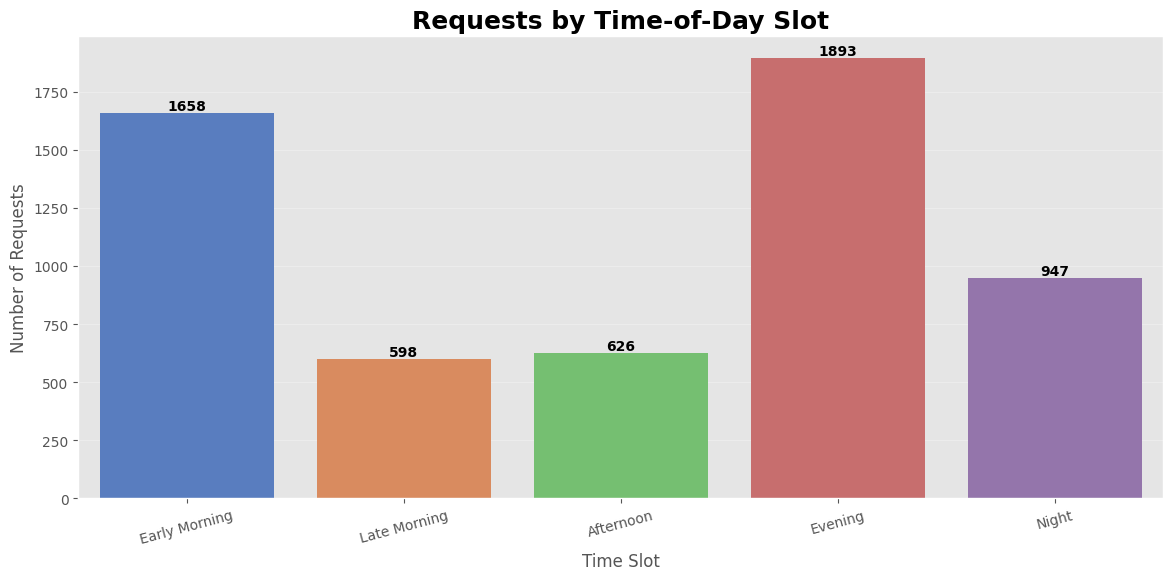

In [30]:
# Chart - 5 visualization code
# Arranging slot order
slot_order = ['Early Morning','Late Morning',
              'Afternoon','Evening','Night']
# Create countplot
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='Time_of_day_slot',
                   order=slot_order, palette='muted')
# Add title and labels
plt.title("Requests by Time-of-Day Slot", fontsize = 18, fontweight = 'bold')
plt.xlabel("Time Slot", fontsize = 12)
plt.ylabel("Number of Requests", fontsize = 12)
plt.xticks(rotation=15)
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight = 'bold')
plt.grid(axis = 'y', alpha = 0.3)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar graph is used to show the number of ride requests during different time slots like morning, afternoon, evening, and night.

##### 2. What is/are the insight(s) found from the chart?

Most requests are in the evening and early morning slots, which shows peak hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight is useful for improved driver shift planning. The negative implication is that if there's not enough supply to meet demand in those slots, it causes customer frustration. Having knowledge of peak times helps improve availability.

#### Chart - 6 - Supply–Demand Gap Flag

In [31]:
# Supply-Demand Gap Flag
gap_summary = (
    df['Gap_Flag']
      .value_counts(dropna=False)
      .to_frame('count')
      .assign(percent=lambda x: x['count']*100/len(df))
)
print("Gap Flag distribution\n", gap_summary)


Gap Flag distribution
           count    percent
Gap_Flag                  
Gap        3914  58.028169
No Gap     2831  41.971831


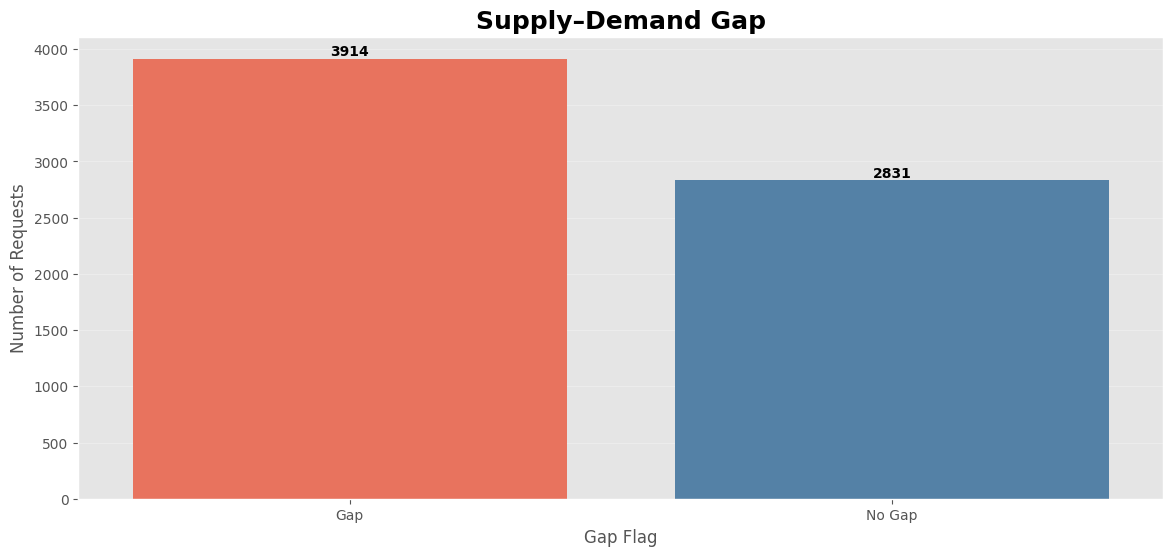

In [32]:
# Chart - 6 visualization code
# Create countplot
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='Gap_Flag',
                   order=df['Gap_Flag'].value_counts().index,
                   palette=['tomato','steelblue',])
# Add title and labels
plt.title("Supply–Demand Gap", fontsize = 18, fontweight =  'bold')
plt.xlabel("Gap Flag", fontsize = 12)
plt.ylabel("Number of Requests", fontsize = 12)
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight = 'bold')
plt.grid(axis = 'y', alpha = 0.3)

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar graph was used to show the number of the requests that faced a supply gap versus those that did not.

##### 2. What is/are the insight(s) found from the chart?

 The graph shows that many of the requests are facing a supply gap, i.e., the majority of rides are unserved.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows the most valuable business insights. High gap rate indicates revenues lost, inefficient use, and customers lost. Such a negative trend needs to be addressed to facilitate business growth.

#### Chart - 7 - Requests by Weekday

In [33]:
# Weekday Requests
weekday_order = ['Monday','Tuesday','Wednesday','Thursday',
                 'Friday','Saturday','Sunday']

weekday_summary = (
    df['Weekday']
      .value_counts(dropna=False)
      .reindex(weekday_order, fill_value=0)
      .to_frame('count')
      .assign(percent=lambda x: x['count']*100/len(df))
)
print("Weekday distribution\n", weekday_summary)


Weekday distribution
            count    percent
Weekday                    
Monday      1367  20.266864
Tuesday     1307  19.377317
Wednesday   1337  19.822090
Thursday    1353  20.059303
Friday      1381  20.474426
Saturday       0   0.000000
Sunday         0   0.000000


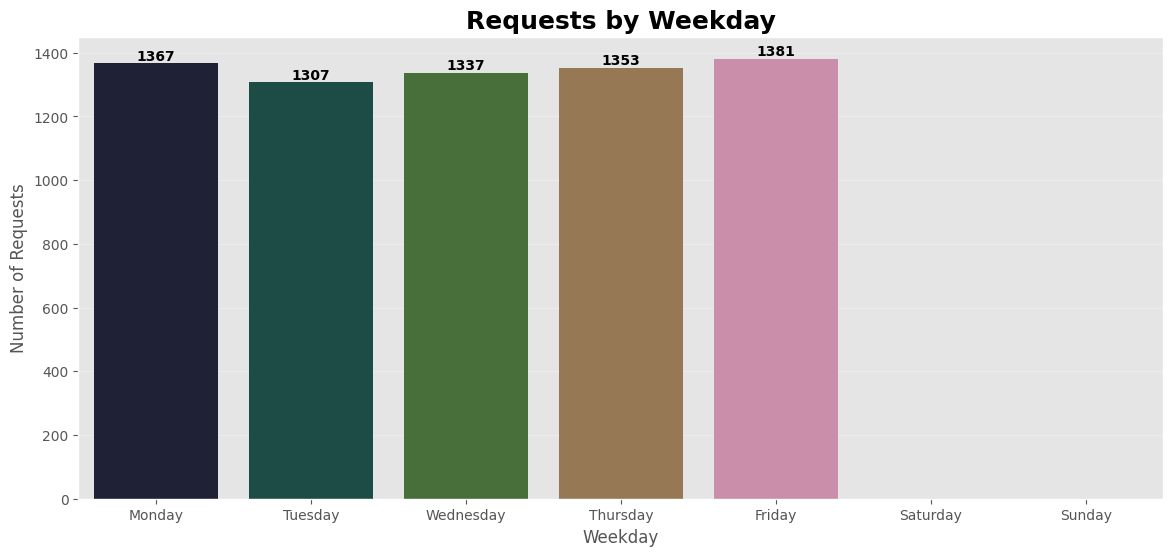

In [34]:
# Chart - 7 visualization code
# Sort Weekdays
weekday_order = ['Monday','Tuesday','Wednesday','Thursday',
                 'Friday','Saturday','Sunday']
# Create countplot
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='Weekday',
                   order=weekday_order, palette='cubehelix')
# Add title and labels
plt.title("Requests by Weekday", fontsize = 18, fontweight = 'bold')
plt.xlabel("Weekday", fontsize = 12)
plt.ylabel("Number of Requests", fontsize = 12)
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight = 'bold')
plt.grid(axis = 'y', alpha = 0.3)

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar graph is used to see how many requests were requested on each weekday.

##### 2. What is/are the insight(s) found from the chart?

The ride requests are roughly even, but there is generally a little bit of a peak on Fridays and lows during weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights help in planning weekly driver schedules and promotions. It creates a problem if there are fewer drivers on weekends when there is high demand, as it impacts the customer experience. Having prior knowledge prevents the issue.

#### Chart - 8 - Hour-of-Day Request Volume

In [35]:
# Hourly Requests
hourly_summary = (
    df['Request_hour']
      .value_counts(dropna=False)
      .sort_index()                             # 0‑23 order
      .to_frame('count')
      .assign(percent=lambda x: x['count']*100/len(df))
)
print("Requests per Hour\n", hourly_summary)

Requests per Hour
               count   percent
Request_hour                 
0                99  1.467754
1                85  1.260193
2                99  1.467754
3                92  1.363973
4               203  3.009637
5               445  6.597480
6               398  5.900667
7               406  6.019274
8               423  6.271312
9               431  6.389918
10              243  3.602669
11              171  2.535211
12              184  2.727947
13              160  2.372128
14              136  2.016308
15              171  2.535211
16              159  2.357302
17              418  6.197183
18              510  7.561156
19              473  7.012602
20              492  7.294292
21              449  6.656783
22              304  4.507042
23              194  2.876205


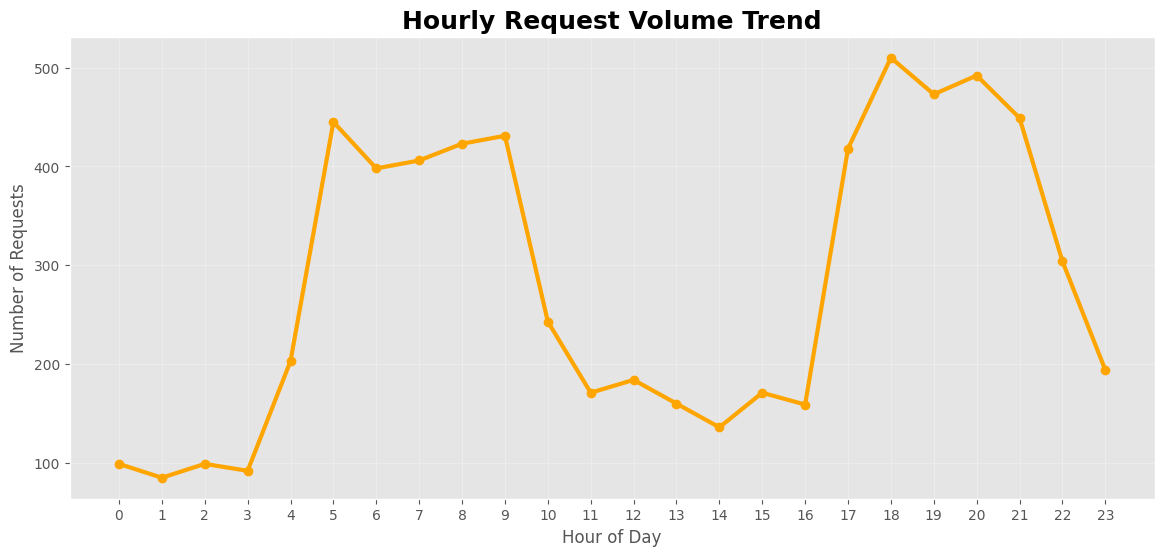

In [36]:
# Chart - 8 visualization code
# Create line plot
plt.figure(figsize=(14,6))
plt.plot(hourly_summary.index, hourly_summary['count'], color='orange', linewidth=3, marker = 'o')
# Add title and labels
plt.title("Hourly Request Volume Trend", fontsize = 18, fontweight = 'bold')
plt.xlabel("Hour of Day", fontsize = 12)
plt.ylabel("Number of Requests", fontsize = 12)
plt.xticks(range(0,24))
plt.grid(alpha = 0.3)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

Hourly trends are ideally represented by a line graph, so the 24-hour demand curve can be visualized.


##### 2. What is/are the insight(s) found from the chart?

Peak demand occurs during morning (5-9 AM) and evening (5-9 PM) hours, matching the customer behaviour

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights is important for driver deployment. The absence of scaled supply within these times leads to business loss and customer churn. Fixed this makes user satisfaction better.

#### Chart - 9 - Trip Duration Distribution

In [37]:
# Trip Duration Distribution
# Descriptive statistics
duration_stats = df['Trip_duration_minutes'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95])
print("\nTrip Duration – descriptive stats\n", duration_stats)

# Optional: number and share of unusually long trips (>60 min)
long_trips = df['Trip_duration_minutes'].gt(60).sum()
print(f"\nTrips exceeding 60 min: {long_trips} ({long_trips*100/len(df):.2f}%)")


Trip Duration – descriptive stats
 count       2831.0
mean     52.413282
std      13.854653
min           21.0
25%           41.0
50%           52.0
75%           64.0
90%           71.0
95%           74.0
max           83.0
Name: Trip_duration_minutes, dtype: Float64

Trips exceeding 60 min: 902 (13.37%)


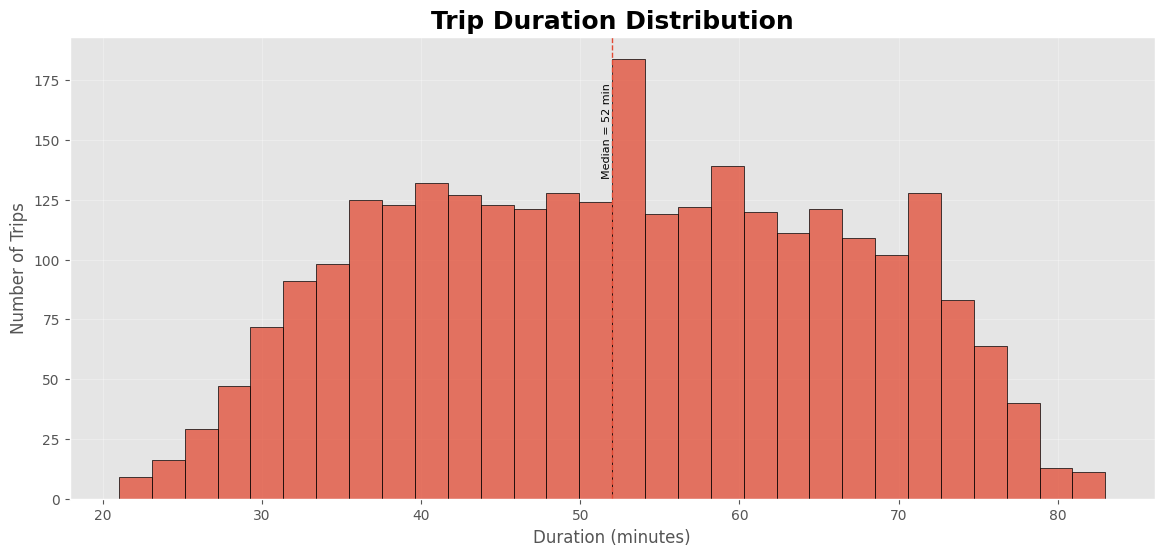

In [38]:
# Chart - 9 visualization code
# Create histogram
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Trip_duration_minutes',
             bins=30, edgecolor='black')
# Add title and labels
plt.title("Trip Duration Distribution", fontsize = 18, fontweight = 'bold')
plt.xlabel("Duration (minutes)", fontsize = 12)
plt.ylabel("Number of Trips", fontsize = 12)

# Median reference line
median_val = df['Trip_duration_minutes'].median()
plt.axvline(median_val, linestyle='--', linewidth=1)
plt.text(median_val, plt.ylim()[1]*0.9,
         f"Median = {median_val:.0f} min",
         rotation=90, va='top', ha='right', fontsize = 8)
plt.grid(alpha = 0.3)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A histogram would be best to gain insight into how trip duration is distributed and spot outliers.

##### 2. What is/are the insight(s) found from the chart?

Most trips are of short to medium length, with very few long trips. There is a small variation of normal trip duration.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights help in route optimization and price models. No explicit negative impact is visible, but longer trips at peak hours can be more prone to cause increased waiting times for other users. Keeping the duration pattern in mind helps in scheduling optimization and reducing idle time.

### **Bivariate Analysis**

#### Chart - 10 - Trip Status by Pickup Point

In [39]:
# Trip status by pickup point
status_pivot = (
    pd.crosstab(df['Pickup_point'], df['Status'], margins=True, normalize='index').round(1)* 100
)
print("Pickup Point × Status (% of each pickup point)\n", status_pivot)


Pickup Point × Status (% of each pickup point)
 Status        Cancelled  No Cars Available  Trip Completed
Pickup_point                                              
Airport            10.0               50.0            40.0
City               30.0               30.0            40.0
All                20.0               40.0            40.0


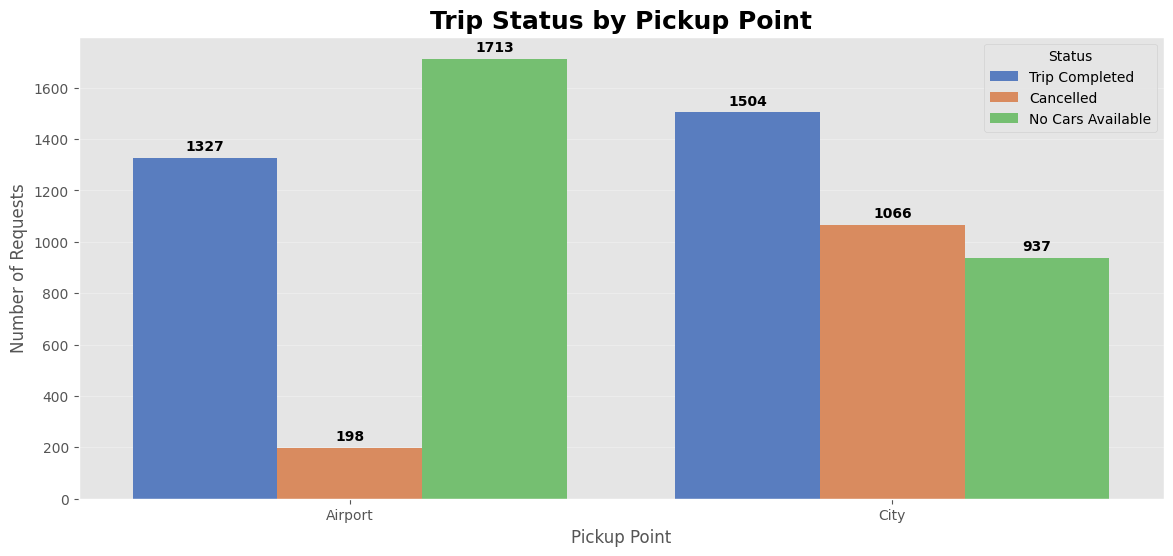

In [40]:
# Chart - 10 visualization code
# Create grouped bar chart
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='Pickup_point', hue='Status', palette='muted')
# Add title and labels
plt.title("Trip Status by Pickup Point", fontsize = 18, fontweight = 'bold')
plt.xlabel("Pickup Point", fontsize = 12)
plt.ylabel("Number of Requests", fontsize = 12)
# Add legend
plt.legend(title='Status', bbox_to_anchor=(1, 1))
# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height:                                # skip empty bars
        ax.annotate(f"{height:.0f}",
                    (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', xytext=(0,3),
                    textcoords="offset points", fontweight = 'bold')
# Add grid
plt.grid(axis = 'y', alpha = 0.3)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart is used to visually compare the distribution of trip status (Completed, Cancelled, No Cars Available) across pickup areas (i.e., City and Airport). This will allow easy visual detection of patterns and variations in service quality by location.

##### 2. What is/are the insight(s) found from the chart?

* In the City, most trips are completed successfully, reflecting higher driver availability and service quality.

* At the Airport, however, most of the requests end up as "No Cars Available," reflecting an acute shortage of drivers there.

* Cancellations are comparatively lower at both pickup points in comparison to the remaining two statuses.

This reflects that operations performance significantly differs among locations, with the City performing better in meeting demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* These insights will help in targeted operational planning. For example, as the City has positive completion rates, the same approach (e.g., high driver density, best matching) can be implemented at the Airport.

* The data also helps to understand location-based user satisfaction and may be utilized to influence marketing or incentive promotions (e.g., encouraging drivers to wait at the Airport).

**Negative Growth:**
    
* The large volume of unfulfilled requests at the Airport can negatively impact the business if not addressed. Passengers work under tight timetables, and persistent service failures can lead them to incurs loss of confidence and switching to competitors.
    
* Also, inability to handle airport demand could result in losses in revenues, since airport journeys are typically longer and more rewarding.

#### Chart - 11 - Trip Status across Time-of-Day Slots

In [41]:
# Trip Status by Time of Day
slot_status = (
    pd.crosstab(df['Time_of_day_slot'], df['Status'], normalize='index')
      .loc[slot_order]
      .round(2) * 100
)
print("Time-of-Day × Status (% rows per slot)\n", slot_status)


Time-of-Day × Status (% rows per slot)
 Status            Cancelled  No Cars Available  Trip Completed
Time_of_day_slot                                              
Early Morning          40.0               19.0            40.0
Late Morning           16.0               25.0            59.0
Afternoon              12.0               29.0            59.0
Evening                 7.0               60.0            34.0
Night                   7.0               51.0            42.0


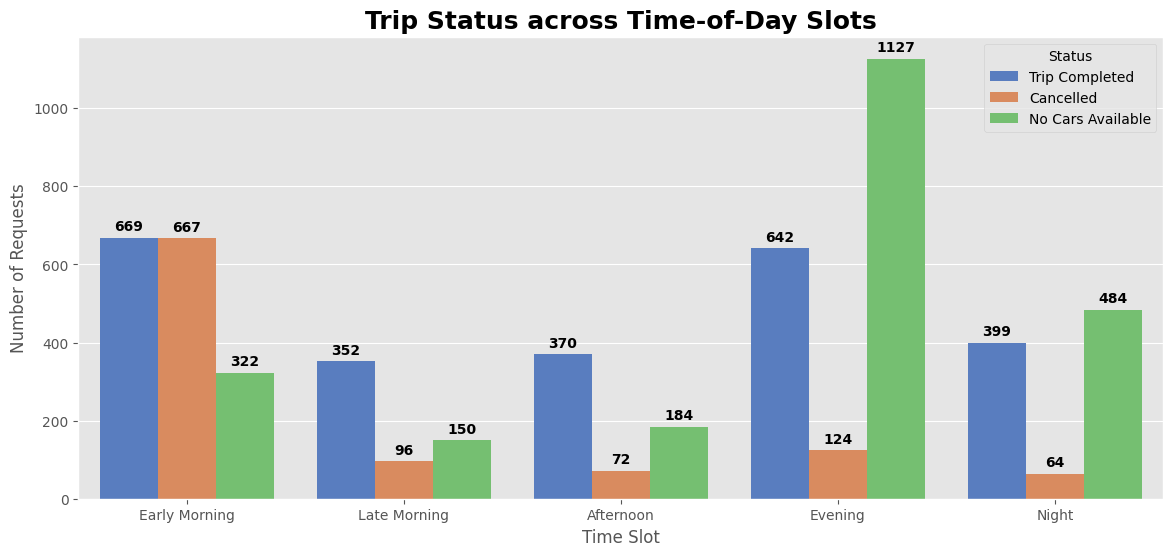

In [42]:
# Chart - 11 visualization code
# Arranging slots
slot_order = ['Early Morning','Late Morning',
              'Afternoon','Evening','Night']
# Set figure size
plt.figure(figsize=(14,6))
# Create stacked bar plot
ax = sns.countplot(data=df, x='Time_of_day_slot', hue='Status',
                   order=slot_order, palette='muted')
# Add title and label
plt.title("Trip Status across Time-of-Day Slots", fontsize = 18, fontweight = 'bold')
plt.xlabel("Time Slot", fontsize = 12)
plt.ylabel("Number of Requests", fontsize = 12)
# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height:                                # skip empty bars
        ax.annotate(f"{height:.0f}",
                    (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', xytext=(0,3),
                    textcoords="offset points", fontweight = 'bold')
# Add legend
plt.legend(title='Status', bbox_to_anchor=(1, 1))
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

The grouped bar graph shows the distribution of trip status across various time periods and helps us comprehend the service performance on the whole day.

##### 2. What is/are the insight(s) found from the chart?

* "No Cars Available" occurs most during evening hours.

* "Completed" trips occur largely at daytime hours.

This implies that peak periods of travel are also periods of peak failure, likely because of imbalance between demand and supply.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** It helps to facilitate driver shift planning as well as demand forecasting.

**Negative Growth:** The insight suggests a negative effect during peak slots when demand is great but service is lacking—particularly inconvenient for professionals traveling to and from work or taking flights.

#### Chart - 12 - Demand Fulfilment by Weekday

In [43]:
# Weekday gaps
weekday_order = ['Monday','Tuesday','Wednesday','Thursday',
                 'Friday']
weekday_gap = (
    pd.crosstab(df['Weekday'], df['Gap_Flag'], normalize='index')
      .loc[weekday_order]
      .round(2) * 100
)
print("Weekday × Gap Flag (% rows per weekday)\n", weekday_gap)

Weekday × Gap Flag (% rows per weekday)
 Gap_Flag    Gap  No Gap
Weekday                
Monday     56.0    44.0
Tuesday    57.0    43.0
Wednesday  57.0    43.0
Thursday   61.0    39.0
Friday     59.0    41.0


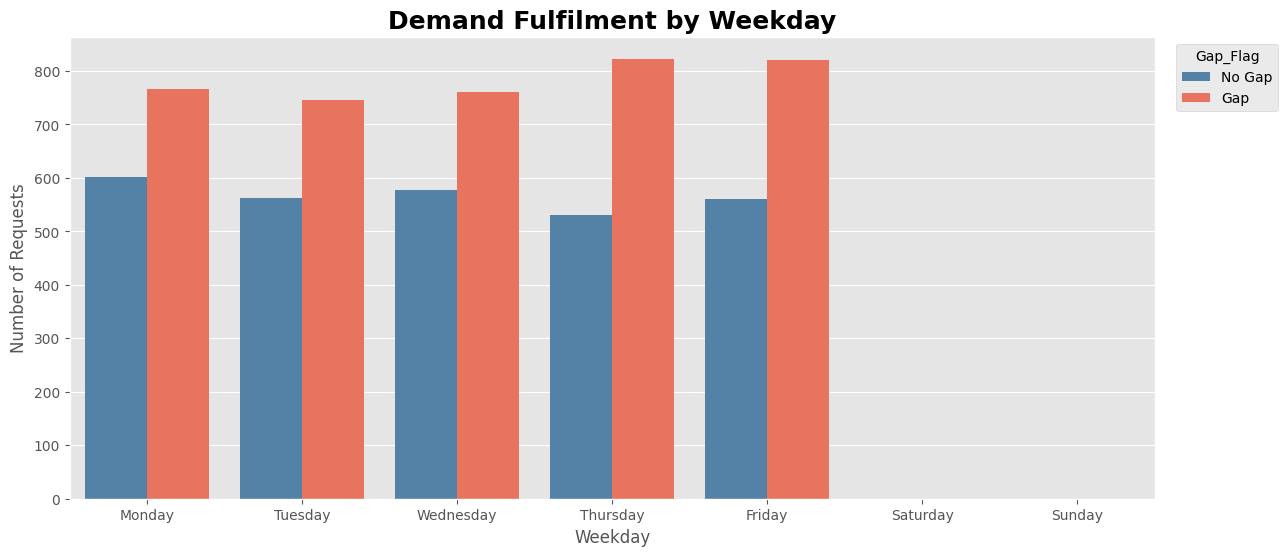

In [44]:
# Chart - 12 visualization code
# Arranging weekdays
weekday_order = ['Monday','Tuesday','Wednesday','Thursday',
                 'Friday','Saturday','Sunday']
# Create grouped bar plot
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='Weekday', hue='Gap_Flag',
                   order=weekday_order, palette=['steelblue','tomato'])
# Add title and label
plt.title("Demand Fulfilment by Weekday", fontsize = 18, fontweight = 'bold')
plt.xlabel("Weekday", fontsize = 12)
plt.ylabel("Number of Requests", fontsize = 12)
# Add legend
plt.legend(title='Gap_Flag', bbox_to_anchor=(1.12, 1))
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A group bar chart enables us to visualize how many requests were completed vs not completed during the week—perfect for determining week-to-week trends of performance.

##### 2. What is/are the insight(s) found from the chart?

* Unmet demand is consistently higher across all weekdays.

* Certain days (e.g., Fridays) show even higher levels of demand-supply gaps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** It enables weekly resource planning and scheduling.

**Negative Growth:** Large number of unmet demands during weekdays signals missed opportunities during the office commute. If ongoing, it can affect user trust and loyalty.

#### Chart - 13 - Hourly Demand v/s Fulfilment

In [45]:
# Hourly Gap
hour_gap = (
    pd.crosstab(df['Request_hour'], df['Gap_Flag'], normalize='index')
      .round(2) * 100
)
print("\nHour × Gap Flag (% rows per hour)\n", hour_gap.head(24))


Hour × Gap Flag (% rows per hour)
 Gap_Flag       Gap  No Gap
Request_hour              
0             60.0    40.0
1             71.0    29.0
2             63.0    37.0
3             63.0    37.0
4             62.0    38.0
5             58.0    42.0
6             58.0    42.0
7             57.0    43.0
8             63.0    37.0
9             60.0    40.0
10            52.0    48.0
11            33.0    67.0
12            34.0    66.0
13            44.0    56.0
14            35.0    65.0
15            40.0    60.0
16            43.0    57.0
17            64.0    36.0
18            68.0    32.0
19            65.0    35.0
20            67.0    33.0
21            68.0    32.0
22            49.0    51.0
23            47.0    53.0


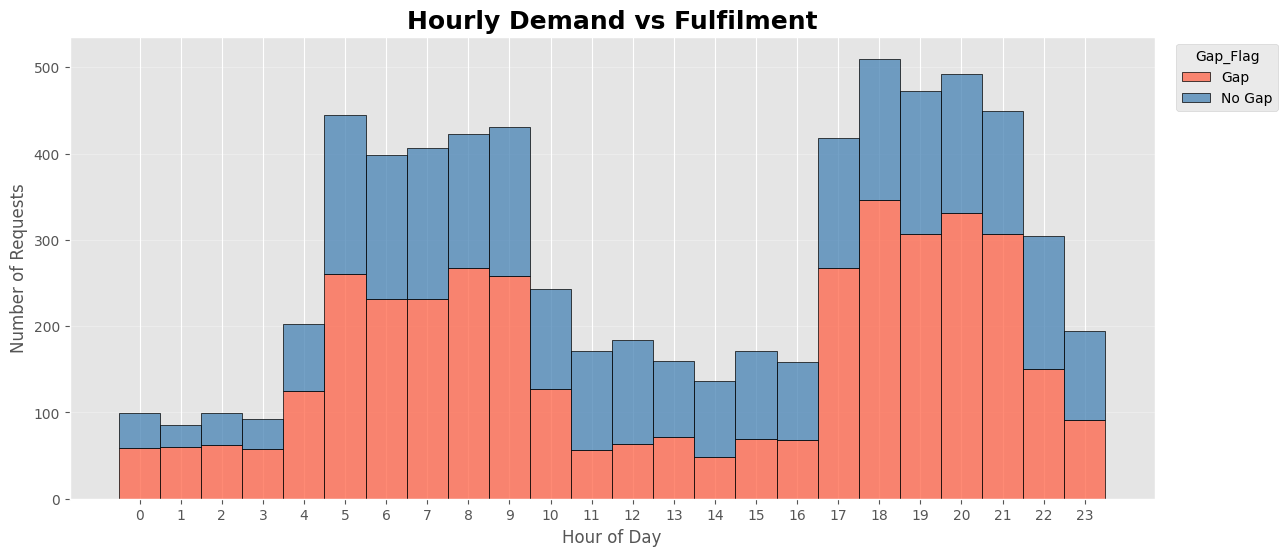

In [46]:
# Chart - 13 visualization code
# Create histogram
plt.figure(figsize=(14,6))
ax = sns.histplot(data=df, x='Request_hour', hue='Gap_Flag',
                  bins=24, multiple='stack', palette=['steelblue','tomato'],
                  edgecolor='black', discrete=True, label = 'Gap_Flag')

# Add title and labels
plt.title("Hourly Demand vs Fulfilment", fontsize = 18, fontweight = 'bold')
plt.xlabel("Hour of Day", fontsize = 12)
plt.ylabel("Number of Requests", fontsize = 12)
plt.xticks(range(0,24))
# Add legend
plt.legend(title='Gap_Flag', bbox_to_anchor=(1.12, 1), labels=['Gap','No Gap'])
# Add grid
plt.grid(axis = 'y', alpha = 0.3)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart helps us understand how the demand-supply gap changes according to hour of day which is useful for long-term planning.

##### 2. What is/are the insight(s) found from the chart?

* Maximum unsatisfied demand occurs during morning (5-9 AM) and evening (5-9 PM) peak hours.

* Off-peak hours experience a minimal demand-supply gap.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** This insight is important as it helps in peak-hour planning.

**Negative Growth:** Disregarding it is one of the cause of lost business during peak demand, and it is a major source of negative growth.

#### Chart - 14 - Trip Duration Distribution by Pick Up Point

In [47]:
# Trip Duration Distribution by pickup point
duration_stats = (
    df.groupby('Pickup_point')['Trip_duration_minutes']
      .describe()[['count','mean','std','min','25%','75%','max']]
      .round(1)
)
print("Trip Duration by Pickup Point – summary stats\n", duration_stats)

Trip Duration by Pickup Point – summary stats
                count  mean   std   min   25%   75%   max
Pickup_point                                            
Airport       1327.0  52.2  13.8  21.0  41.0  64.0  82.0
City          1504.0  52.6  13.9  21.0  41.0  64.0  83.0


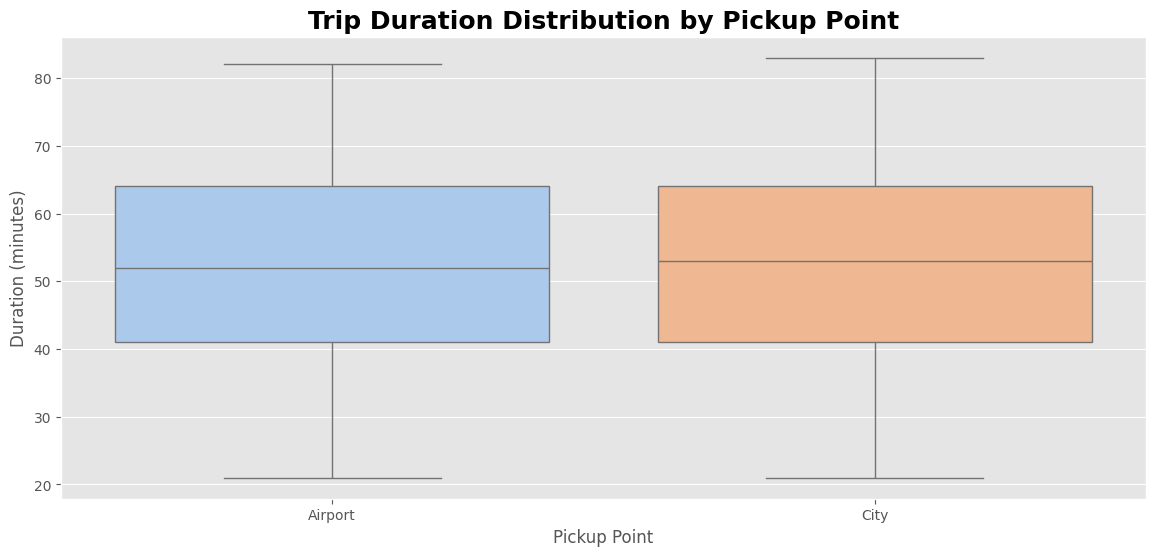

In [48]:
# Chart - 14 visualization code
# Create box plot
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Pickup_point', y='Trip_duration_minutes', palette='pastel')
# Add title and labels
plt.title("Trip Duration Distribution by Pickup Point", fontsize = 18, fontweight = 'bold')
plt.xlabel("Pickup Point", fontsize = 12)
plt.ylabel("Duration (minutes)", fontsize = 12)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is a great way to display the variability and distribution of trip lengths by pickup location as it is ideal for comparing central tendency and outliers.

##### 2. What is/are the insight(s) found from the chart?

* Airport trips have longer duration (makes sense with longer distance).
* City trips are more spread out but mostly shorter.
* It helps understanding travel time expectations by location.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** This insight can be applied in pricing algorithms, ETA prediction, and driver assignment logic.

**Negative Growth:** Without properly priced or scheduled longer airport runs, it can cause driver resistance, decreasing availability for those routes.

#### Chart - 15 - Trip Duration vs Trip Status

In [49]:
# Trip Duration vs Trip Status
completed_duration = df.query("Status == 'Trip Completed'")['Trip_duration_minutes']
print("Completed Trip Duration – descriptive stats\n",completed_duration.describe(percentiles=[.25,.5,.75,.9]).round(1))


Completed Trip Duration – descriptive stats
 count    2831.0
mean       52.4
std        13.9
min        21.0
25%        41.0
50%        52.0
75%        64.0
90%        71.0
max        83.0
Name: Trip_duration_minutes, dtype: Float64


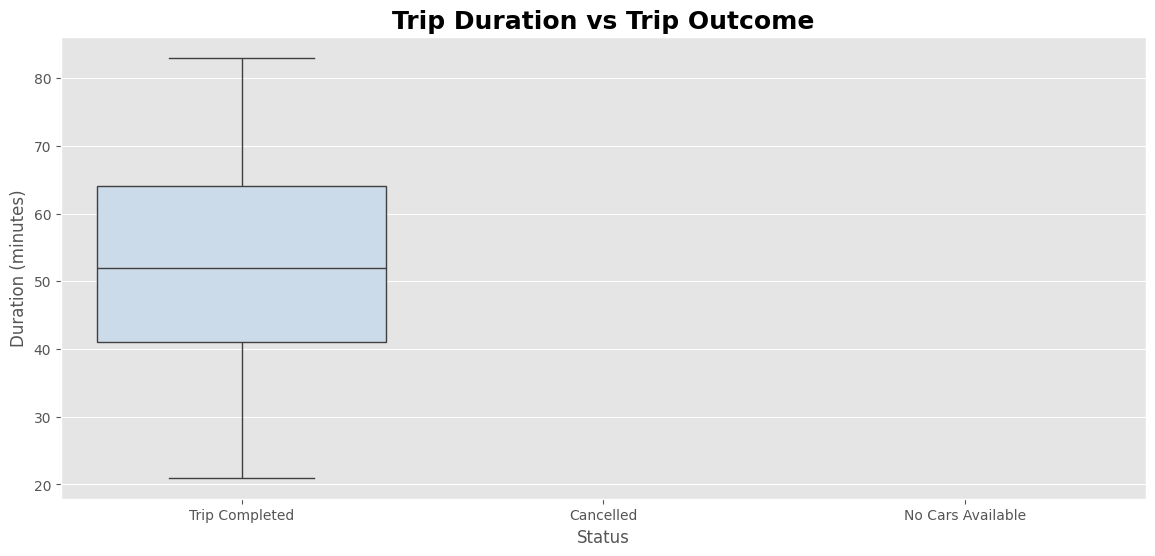

In [50]:
# Chart - 15 visualization code
# Create box plot
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Status', y='Trip_duration_minutes', palette='Blues')
# Add title and labels
plt.title("Trip Duration vs Trip Outcome", fontsize = 18, fontweight = 'bold')
plt.xlabel("Status", fontsize = 12)
plt.ylabel("Duration (minutes)", fontsize = 12)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot used to examine variation of trip length with trip status (Completed, Cancelled, No Cars).

##### 2. What is/are the insight(s) found from the chart?

* Completed trips have a clear and smaller set of durations.
* Cancelled and no-car trips have no or extremely short durations noted, which indicates that they failed early.
* It separates success and failure in operations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** This insight highlights that failed trips never even enter the system properly, leading to operational loss.

**Negative Growth:** These "immediate failures" locate where the technical or real-time matching issues are, which affect the business if they are not rectified.

#### Chart - 16 - Supply vs Demand Trend

In [51]:
# Create a numeric gap flag (0/1) from the text field
gap_map = {"gap": 1, "no gap": 0}

df['Gap_Flag_num'] = (
    df['Gap_Flag']            # original text column
      .str.strip()            # remove leading/trailing spaces
      .str.lower()            # uniform case
      .map(gap_map)           # convert to 1 / 0
      .fillna(0)              # any unexpected value → treat as No Gap
      .astype(int)
)

In [52]:
# Supply vs Demand Summary
hourly_supply_demand = (
    df.groupby('Request_hour', as_index=False)
      .agg(demand=('Request_id', 'count'),
           gap   =('Gap_Flag_num', 'sum'))
      .assign(
          supply      = lambda x: x['demand'] - x['gap'],
          fulfil_rate = lambda x: (100 * x['supply'] / x['demand']).round(1)
      )
)

print("Hourly Supply‑Demand Summary")
print(hourly_supply_demand.head(24))

Hourly Supply‑Demand Summary
    Request_hour  demand  gap  supply  fulfil_rate
0              0      99   59      40         40.4
1              1      85   60      25         29.4
2              2      99   62      37         37.4
3              3      92   58      34         37.0
4              4     203  125      78         38.4
5              5     445  260     185         41.6
6              6     398  231     167         42.0
7              7     406  232     174         42.9
8              8     423  268     155         36.6
9              9     431  258     173         40.1
10            10     243  127     116         47.7
11            11     171   56     115         67.3
12            12     184   63     121         65.8
13            13     160   71      89         55.6
14            14     136   48      88         64.7
15            15     171   69     102         59.6
16            16     159   68      91         57.2
17            17     418  267     151         36.1
18

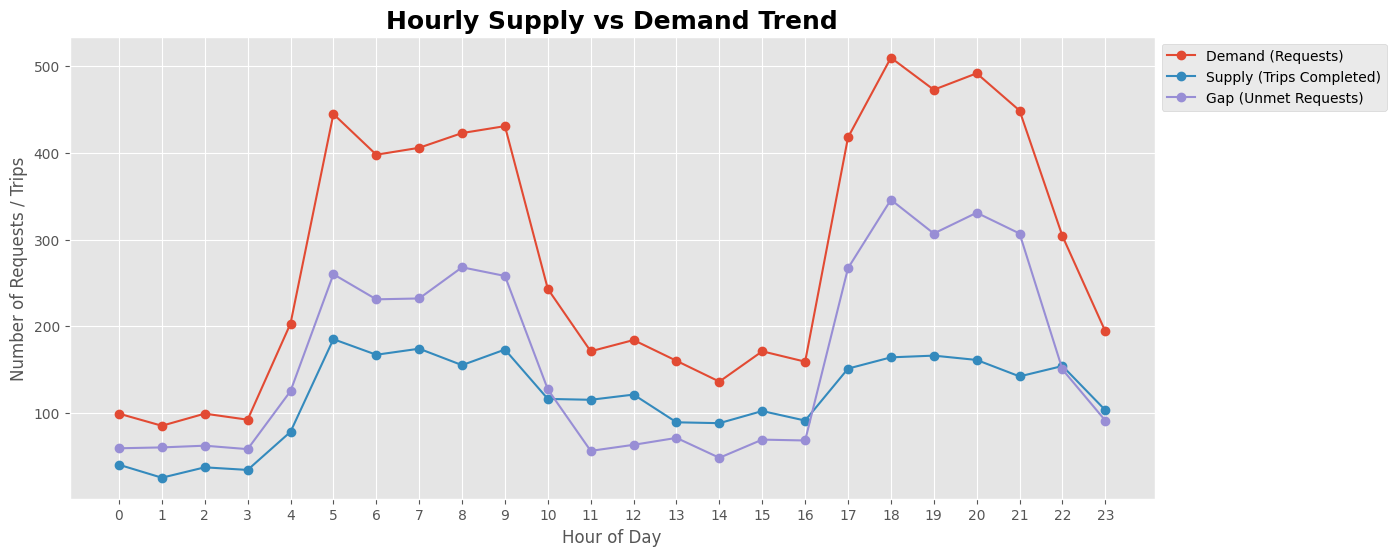

In [53]:
# Chart - 16 visualization code
# Supply (completed trips) vs. Demand (all requests) vs. Gap (unmet) by hour
# Set figure size
plt.figure(figsize=(14,6))

# Prepare hourly aggregates
hourly = (
    df.groupby('Request_hour', as_index=False)
      .agg(demand=('Request_id', 'count'),
           gap   =('Gap_Flag_num', 'sum'))
      .assign(supply=lambda x: x['demand'] - x['gap'])
)

# Create line plot
plt.plot(hourly['Request_hour'], hourly['demand'], marker='o', label='Demand (Requests)')
plt.plot(hourly['Request_hour'], hourly['supply'], marker='o', label='Supply (Trips Completed)')
plt.plot(hourly['Request_hour'], hourly['gap'],    marker='o', label='Gap (Unmet Requests)')
# Add title and labels
plt.title("Hourly Supply vs Demand Trend", fontsize = 18, fontweight = 'bold')
plt.xlabel("Hour of Day", fontsize = 12)
plt.ylabel("Number of Requests / Trips", fontsize = 12)
plt.xticks(range(0,24))
# Add legend
plt.legend(bbox_to_anchor = (1,1))
# Add grid
plt.grid(True)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is used to show trends over time, particularly when the x-axis is a continuous variable such as hour of day (0-23). In this case, we are analyzing how demand (total requests) and supply (filled trips) vary by the hour. Having the gap (unmet demand) included helps us easily identify peak-hour mismatches.

##### 2. What is/are the insight(s) found from the chart?

* Peak times have the highest gap between demand and supply.
* During early or late peak periods, drivers are not willing or available to drive.
* There is greater balancing of services off-peak.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

These insights show some peak time slots (morning and evening) where unmet demand is high. This can be leveraged by Uber:

* Encourage drivers to come online in these peak hours.

* Offer dynamic pricing/surge fees to pull in more supply.

* Offer superior customer satisfaction by increasing trip completion rates.

* Allow optimal usage of resources by Uber, e.g., pre-positioning the drivers or using targeted communications (e.g., pre-peak-demand notification to drivers).

**Negative Growth:**
* Higher gap during peak hours can lead into customer dissatisfaction, longer wait times, and likely customer switching to other companies.

* The business loses revenue each time a request cannot be met, particularly during peak-demand periods when rates are higher.

* Poor service on a regular basis during peak hours (e.g., airport pick-up or office-going hours) may impact brand trust.


### **Multivariate Analysis**

#### Chart - 17 - Gap-Rate Heatmap

In [76]:
print("Gap % table (same numbers the heatmap shows)\n", gap_heat.round(1))

Gap % table (same numbers the heatmap shows)
 Pickup_point      Airport  City
Time_of_day_slot               
Early Morning        11.1  71.9
Late Morning         27.0  49.7
Afternoon            35.7  44.4
Evening              78.6  24.3
Night                67.5  39.3


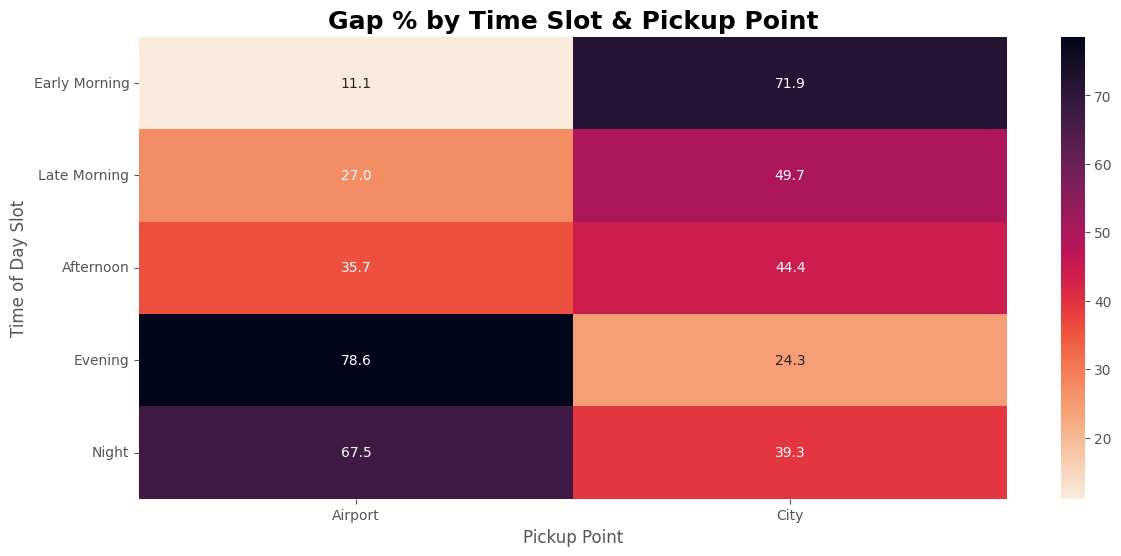

In [54]:
# Chart - 17 visualization code
# Pivot: % gap = unmet / total  ×100
# Create pivot table
gap_heat = (
    df.pivot_table(index='Time_of_day_slot',
                   columns='Pickup_point',
                   values='Gap_Flag_num',      # 1 = gap, 0 = no gap
                   aggfunc='mean') * 100   # convert to %
).loc[['Early Morning','Late Morning',
       'Afternoon','Evening','Night']]
# Create heatmap
plt.figure(figsize=(14,6))
sns.heatmap(gap_heat, annot=True, fmt=".1f", cmap='rocket_r')
# Add title and labels
plt.title("Gap % by Time Slot & Pickup Point", fontsize = 18, fontweight = 'bold')
plt.xlabel("Pickup Point", fontsize = 12)
plt.ylabel("Time of Day Slot", fontsize = 12)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is ideal to contrast two groups (e.g., Pickup Point and Time-of-Day Slot) with a third measure (Gap Rate) depicted by intensity of color. It is very easy to identify where and when demand is not satisfied using just a glance at colors.

##### 2. What is/are the insight(s) found from the chart?

* City in Early Morning is the darkest, signifying maximum gap rate.

* Airport in Early Morning is lighter, signifying higher fulfilment.

* Evening slots (both City and Airport) also signify medium to high gap rates.

* The trend indicates gap rates are both location-dependent and time-specific.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Assist Uber in mapping out the high-gap regions in order to target driver incentives.

* Beneficial to enhance demand-supply matching through dynamic scheduling.

**Negative Growth:**
* Without taking airport evening gaps into account, passengers (particularly business or flight customers) may shift to competitors because of cancelled or rescheduled trips.

* Consistently high gap rates lead to loss of customer trust and reduced usage of apps.


#### Chart - 18 - Fulfil-Rate Grouped Bar

In [75]:
# Fulfilment Rate
eda_fulfil = fulfil.pivot(index='Time_of_day_slot',
                          columns='Pickup_point',
                          values='fulfil_pct').loc[slot_order]
print("Fulfil % table\n", eda_fulfil.round(1))

Fulfil % table
 Pickup_point      Airport  City
Time_of_day_slot               
Early Morning        88.9  28.1
Late Morning         73.0  50.3
Afternoon            64.3  55.6
Evening              21.4  75.7
Night                32.5  60.7


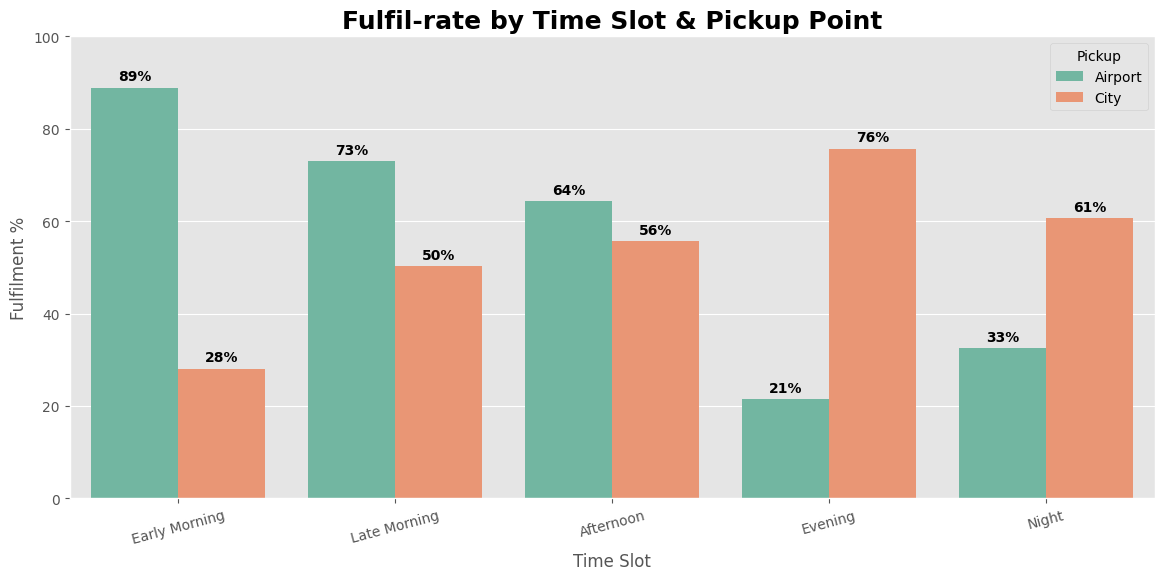

In [55]:
# Chart - 18 visualization code
# Build fulfil-rate %
fulfil = (
    df.groupby(['Time_of_day_slot','Pickup_point'])
      .agg(demand=('Request_id','count'),
           gap=('Gap_Flag_num','sum'))
      .assign(fulfil_pct=lambda x: 100*(x['demand']-x['gap'])/x['demand'])
      .reset_index()
)
# Arranging time slots
slot_order = ['Early Morning','Late Morning',
              'Afternoon','Evening','Night']
# Create bar plot
plt.figure(figsize=(14,6))
ax = sns.barplot(data=fulfil, x='Time_of_day_slot', y='fulfil_pct',
                 hue='Pickup_point', order=slot_order, palette='Set2')
# Add title and labels
plt.title("Fulfil-rate by Time Slot & Pickup Point", fontsize = 18, fontweight = 'bold')
plt.xlabel("Time Slot", fontsize = 12)
plt.ylabel("Fulfilment %", fontsize = 12)
plt.xticks(rotation=15)
plt.legend(title='Pickup', bbox_to_anchor=(1, 1))
plt.ylim(0,100)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height:                                # skip empty bars
        ax.annotate(f"{height:.0f}%",
                    (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', xytext=(0,3),
                    textcoords="offset points", fontweight = 'bold')
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart is useful for simple side-by-side comparison of pickup location (City and Airport) fulfilment rates across different time slots. It is best used to show percentage differences between groups.

##### 2. What is/are the insight(s) found from the chart?

* Airport-Early Morning the highest level of fulfilment (89%).

* Airport-Evening has the lowest level of fulfilment (21%).

* Evening is also an issue for airport as bar dips to 21%, indicating evening rush is a universal pain point.

* City bars are taller than Airport bars, suggesting that the city always meets a greater percentage of its demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Promotes business decisions such as driver reallocation and time-based bonuses/incentives to enhance fulfil rates in poorly performing areas.

* Enhances the optimal use of the driver workforce.

**Negative Growth:**

If there is failure to solve persistently low fulfilling areas (e.g., City in the morning) then it can lead to negative word-of-mouth, and thereby Uber's reputation will be affected and bookings of rides from the said area will decrease.

#### Chart - 19 - Trip Duration by Slot & Pickup

In [74]:
# Trip duration by slot and pickup
violin_stats = (
    df.query("Status == 'Trip Completed'")
      .groupby(['Time_of_day_slot','Pickup_point'])['Trip_duration_minutes']
      .describe()[['count','mean','std']]
      .round(1)
)
print("Trip duration stats by Slot & Pickup\n", violin_stats)

Trip duration stats by Slot & Pickup
                                count  mean   std
Time_of_day_slot Pickup_point                   
Afternoon        Airport       162.0  51.5  13.7
                 City          208.0  52.5  13.8
Early Morning    Airport       297.0  52.0  14.1
                 City          372.0  53.4  13.8
Evening          Airport       312.0  52.1  13.8
                 City          330.0  51.3  13.3
Late Morning     Airport       165.0  53.1  13.4
                 City          187.0  52.4  14.0
Late Night       Airport       188.0  51.9  14.1
                 City          211.0  53.5  14.3
Night            Airport       203.0  52.9  14.1
                 City          196.0  52.2  14.3


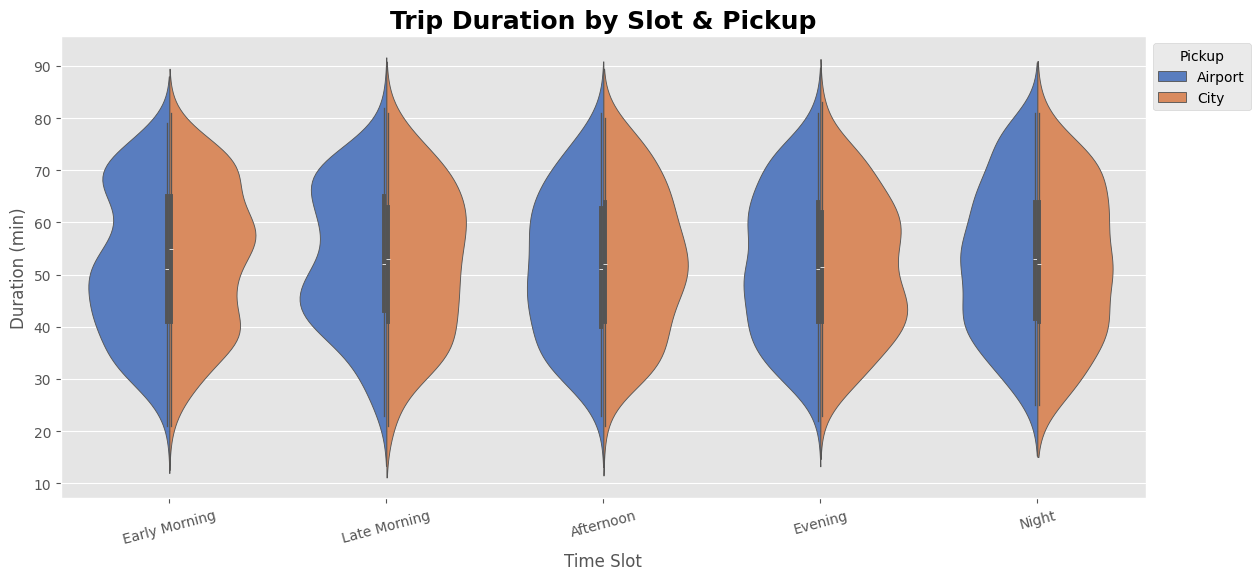

In [59]:
# Chart - 19 visualization code
# Create violin plot
plt.figure(figsize=(14,6))
sns.violinplot(data=df.query("Status == 'Trip Completed'"),
               x='Time_of_day_slot', y='Trip_duration_minutes',
               hue='Pickup_point', order=slot_order,
               palette='muted', split=True)
# Add title and labels
plt.title("Trip Duration by Slot & Pickup", fontsize = 18, fontweight = 'bold')
plt.xlabel("Time Slot", fontsize = 12)
plt.ylabel("Duration (min)", fontsize = 12)
plt.xticks(rotation=15)
# Add legend
plt.legend(title='Pickup', bbox_to_anchor= (1,1))
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

The violin plot is used to show distribution and density of a numerical variable such as trip duration for combinations of two categories (Time Slot and Pickup Point). It provides more information than a boxplot by demonstrating frequency of occurrences too.

##### 2. What is/are the insight(s) found from the chart?

* Airport trips are longer than city trips for all time horizons.

* Travel times are very consistent (tight distributions) with hardly any outliers.

* There is very little effect of time horizon on travel time, suggesting stability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Balanced trip times facilitate proper fare estimation and higher customer expectations.

* Uber can schedule efficient driver shifts based on balanced trip times.

**Negative Growth:**
* Longer airport trip times will demotivate drivers if not reasonably compensated.

* Long airport trips blocking the return of cars early may result in increased supply shortfalls within city areas during peak hours.


#### Chart - 20 - Correlation Heatmap

In [79]:
# Correlation Matrix
print("\nCorrelation matrix values\n", corr_matrix.round(2))


Correlation matrix values
                        Request_hour  Trip_duration_minutes  Gap_Flag_num
Request_hour                   1.00                  -0.02          0.02
Trip_duration_minutes         -0.02                   1.00           NaN
Gap_Flag_num                   0.02                    NaN          1.00


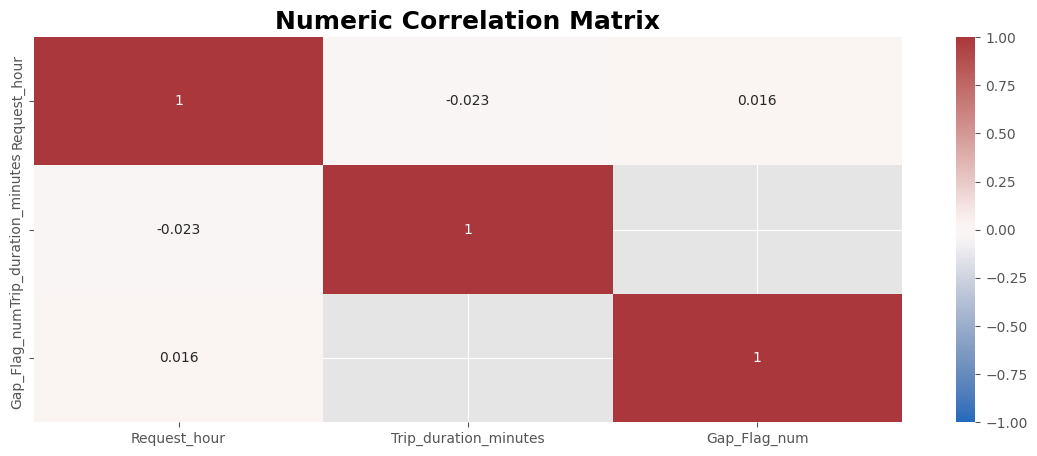

In [77]:
# Correlation Heatmap visualization code
# Finding correlation for all numeric columns
numeric_cols = ['Request_hour','Trip_duration_minutes','Gap_Flag_num']
corr_matrix = df[numeric_cols].corr()
# Create heatmap
plt.figure(figsize=(14,5))
sns.heatmap(corr_matrix, annot=True, cmap='vlag', vmin=-1, vmax=1)
plt.title("Numeric Correlation Matrix", fontsize =18, fontweight = 'bold')
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap of the correlation matrix is best for a general view of linear correlations between numeric data. It simplifies detecting possible prediction variables or underlying trends that might not be visually apparent from simple plots.

##### 2. What is/are the insight(s) found from the chart?

* Weak correlations (< 0.1) in most of the variables.

* Trip Duration and Request Hour have nearly zero linear correlation.

* The plot indicates that Gap Flag cannot be described by other numerical characteristics linearly, confirming the necessity of multivariate and categorical analysis.

#### Chart - 21 - Pair Plot

In [81]:
# Numeric Correlations
print("\nNumeric correlations\n", df[['Request_hour','Trip_duration_minutes','Gap_Flag_num']].corr())


Numeric correlations
                        Request_hour  Trip_duration_minutes  Gap_Flag_num
Request_hour               1.000000              -0.022754      0.015772
Trip_duration_minutes     -0.022754               1.000000           NaN
Gap_Flag_num               0.015772                    NaN      1.000000


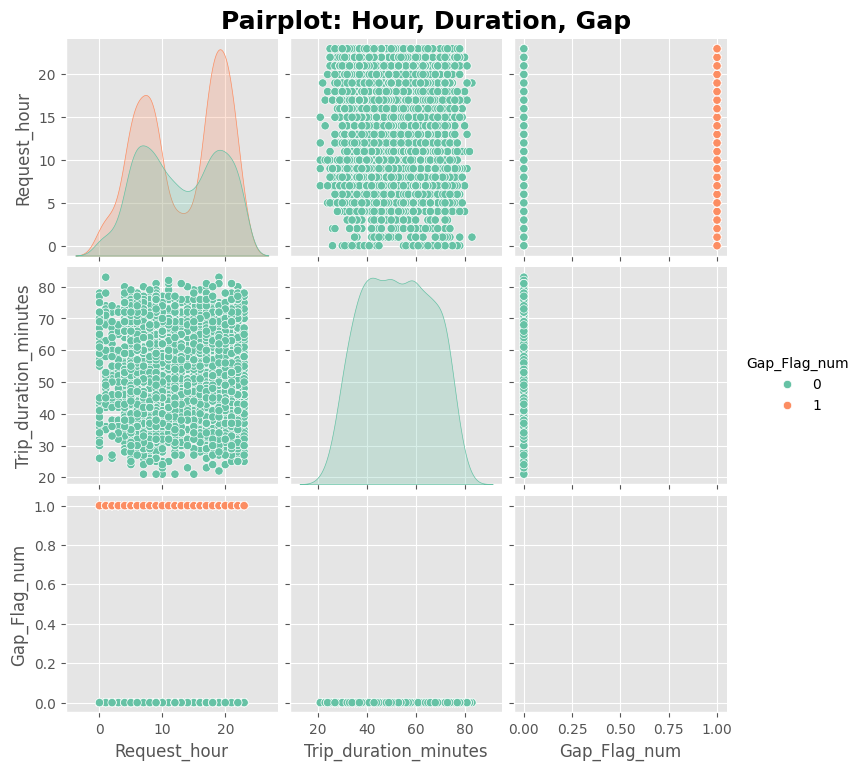

In [72]:
# Pair Plot visualization code
# Create pairplot
sns.pairplot(
    df[['Request_hour','Trip_duration_minutes','Gap_Flag_num','Status']],
    hue='Gap_Flag_num', palette='Set2',                                       # Flag 0 = successful trips , Flag 1 = failed trips
    vars=['Request_hour','Trip_duration_minutes','Gap_Flag_num']
)
# Add title
plt.suptitle("Pairplot: Hour, Duration, Gap", y=1.02, fontsize = 18, fontweight = 'bold')
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

The pairplot provides a rapid overview of relationships among several numerical variables in a single grid of histograms and scatterplots. It is helpful to look for any type of linear or non-linear relationship, group separation, or outliers.

##### 2. What is/are the insight(s) found from the chart?

* No clear strong correlation is observed between Request Hour and Trip Duration indicating that trip duration does not depend strongly on time.

* Gap flag (numeric) clearly separates failed and successful trips which shows flag as a effective label.

* Shows that numeric variables such as duration or hour do not generate demand gaps by themselves — categorical context is important.

# **Conclusion**

Exploratory Data Analysis (EDA) of the Uber request data provided clear supply-demand imbalances, which were mainly due to time-of-day and pickup location effects. Demand peaks sharply in the early morning and evening, particularly for airport pickups, while demand hours are fairly short, leaving a gap rate over 70% in peak timeslots. City pickups experience relatively better fulfillment, especially in the evening. Visualizations also highlighted that trip duration remain consistent, and consequently, inefficiencies arise not due to ride size but missed timing of driver availability. The multivariate analysis further confirmed that gap rates are highest during high-demand time slots and that there are no strong correlations between numeric variables, affirming the significance of categorical and time based patterns. Therefore, these findings are critical to guiding targeted interventions such as driver incentives, real-time pricing, or fleet repositioning in order to boost compliance and customer satisfaction, ultimately generating positive business outcomes by responding to supply shortages at the time and location it is most valuable.